<a href="https://colab.research.google.com/github/milkadata/Classification-Model-2023/blob/main/June10_Week_10_Assignment_3_COLLEGE_DATA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Week 8/DATA/COLLEGE ACCEPTANCE.csv')
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


#1. Pre-processing steps

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Number of students receiving an Associate's degree,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment that are White,Percent of graduate enrollment that are two or more races,Percent of graduate enrollment that are Race/ethnicity unknown,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of graduate enrollment that are women,Number of first-time undergraduates - in-state,Percent of first-time undergraduates - in-state,Number of first-time undergraduates - out-of-state,Percent of first-time undergraduates - out-of-state,Number of first-time undergraduates - foreign countries,Percent of

#FEATURE ENGINEERING

In [6]:
df.columns.tolist()

['Name',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Estimated enrollment, total',
 'Estimated enrollment, full time',
 'Estimated enrollment, part time',
 'Estimated undergraduate enrollment, total',
 'Estimated undergraduate enrollment, full time',
 'Estimated undergraduate enrollment, part time',
 'Estimated freshman undergraduate enrollment, total',
 'Estimated freshman enrollment, full time',
 'Estimated freshman enrollment, part time',
 'Estimated graduate enrollment, total',
 'Estimated graduate enrollment, full time',
 'Estimated graduate enrollment, part

In [7]:
df = df.loc[:, [
 'State abbreviation',
 'Degree of urbanization (Urban-centric locale)',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'SAT Math 25th percentile score',
 'SAT Critical Reading 25th percentile score',
 'Carnegie Classification 2010: Basic',
 'Tuition and fees, 2013-14',
 'Percent of total enrollment that are Hispanic/Latino',
 'Percent of total enrollment that are women']]

In [8]:
#find out how many caetegories in each categorical group

for column in df.columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Calculate value counts for the column
        value_counts = df[column].value_counts()
        # Calculate the percentage for each category
        percentages = value_counts / len(df) * 100
        # Print the results
        print(f"Column: {column}")
        print(percentages)
        print()

Column: State abbreviation
New York                7.953064
Pennsylvania            7.431551
California              6.062581
Texas                   4.563233
Ohio                    3.911343
Massachusetts           3.846154
Illinois                3.520209
Florida                 3.455020
North Carolina          3.324641
Michigan                3.259452
Georgia                 2.803129
Indiana                 2.803129
Virginia                2.672751
Missouri                2.411995
Tennessee               2.346806
Wisconsin               2.281617
Minnesota               2.086050
South Carolina          2.020860
New Jersey              1.825293
Alabama                 1.825293
Kentucky                1.825293
Iowa                    1.760104
Kansas                  1.629726
Maryland                1.629726
Oklahoma                1.564537
Washington              1.434159
Louisiana               1.368970
Colorado                1.303781
Connecticut             1.303781
Arkansas        

In [9]:
df.head()

,State abbreviation,Degree of urbanization (Urban-centric locale),Applicants total,Admissions total,Enrolled total,SAT Math 25th percentile score,SAT Critical Reading 25th percentile score,Carnegie Classification 2010: Basic,"Tuition and fees, 2013-14",Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women
0,Alabama,City: Midsize,6142.0,5521.0,1104.0,350.0,370.0,Master's Colleges and Universities (larger pro...,7182.0,1.0,55.0
1,Alabama,City: Midsize,5689.0,4934.0,1773.0,520.0,520.0,Research Universities (very high research acti...,7206.0,3.0,61.0
2,Alabama,City: Midsize,NaN,NaN,NaN,NaN,NaN,Baccalaureate Colleges--Arts & Sciences,6870.0,1.0,58.0
3,Alabama,City: Midsize,2054.0,1656.0,651.0,510.0,510.0,Research Universities (very high research acti...,9192.0,3.0,44.0
4,Alabama,City: Midsize,10245.0,5251.0,1479.0,370.0,380.0,Master's Colleges and Universities (larger pro...,8720.0,1.0,61.0


In [10]:
#Consolidating the SAT scores for 25th percentile
df['TotalSAT25'] = df['SAT Critical Reading 25th percentile score'] + df['SAT Math 25th percentile score']  

In [11]:
# I want the target to guess the acceptance rate of a college using the features. To do that, we had to create a acceptance % column
df['Acceptance'] = (df['Admissions total'] /df['Applicants total']) .round(2)

In [12]:
# Schools yield rate is the total of students that actually accepted the offered vs the total admitted
#A high yield rate is expected at good schools
df['Yield Rate'] = (df['Enrolled total'] /df['Admissions total']).round(2)

In [13]:
# Get the unique state types
df['State abbreviation'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
#apply a regional mapping to the states
region_mapping = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Apply the mapping to create the 'Region' column
df['Region'] = df['State abbreviation'].map(region_mapping)
region_list = df['Region'].unique()
region_list

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [15]:
#List of urbanization
df['Degree of urbanization (Urban-centric locale)'].unique()

array(['City: Midsize', 'City: Small', 'Town: Fringe', 'Town: Distant',
       'Rural: Remote', 'Suburb: Large', 'Rural: Fringe', 'City: Large',
       'Suburb: Small', 'Town: Remote', 'Rural: Distant',
       'Suburb: Midsize'], dtype=object)

In [16]:
urbanization_mapping = {
    'City: Midsize': 'City',
    'City: Small': 'City',
    'City: Large': 'City',   
    'Town: Fringe': 'Town',
    'Town: Distant': 'Town',
    'Town: Remote': 'Town',
    'Rural: Remote': 'Rural',
    'Rural: Fringe': 'Rural',
    'Rural: Distant': 'Rural',
    'Suburb: Large': 'Suburb',
    'Suburb: Midsize': 'Suburb'
}

# Apply the mapping to create the column
df['Urbanization'] = df['Degree of urbanization (Urban-centric locale)'].map(urbanization_mapping)
df['Urbanization'].unique()

array(['City', 'Town', 'Rural', 'Suburb', nan], dtype=object)

In [17]:
#List of urbanization
df['Carnegie Classification 2010: Basic'].value_counts()


Master's Colleges and Universities (larger programs)     375
Baccalaureate Colleges--Diverse Fields                   313
Baccalaureate Colleges--Arts & Sciences                  251
Master's Colleges and Universities (medium programs)     162
Research Universities (very high research activity)      107
Research Universities (high research activity)            98
Master's Colleges and Universities (smaller programs)     93
Doctoral/Research Universities                            74
Baccalaureate/Associate's Colleges                        61
Name: Carnegie Classification 2010: Basic, dtype: int64

In [18]:
#do the degree mappings
degree_mapping = {
    'City: Midsize': 'City',
      "Master's Colleges and Universities (larger programs)": "Master's Colleges and Universities",
       'Research Universities (very high research activity)': "Master's Colleges and Universities",
       'Baccalaureate Colleges--Arts & Sciences': "Baccalaureate Colleges",
       'Research Universities (high research activity)': 'Research Universities',
       'Baccalaureate Colleges--Diverse Fields': 'Baccalaureate Colleges',
       "Master's Colleges and Universities (medium programs)": "Master's Colleges and Universities",
       "Master's Colleges and Universities (smaller programs)": "Master's Colleges and Universities",
       'Doctoral/Research Universities': 'Doctoral & Research Universities',
       "Baccalaureate/Associate's Colleges": "Baccalaureate & Associate's Colleges"
}

# Apply the mapping to create the column
df['Degree'] = df['Carnegie Classification 2010: Basic'].map(degree_mapping)
df['Degree'].value_counts()

Master's Colleges and Universities      737
Baccalaureate Colleges                  564
Research Universities                    98
Doctoral & Research Universities         74
Baccalaureate & Associate's Colleges     61
Name: Degree, dtype: int64

In [19]:
#create a "top school" column ONLY with the schools that have less than 20% acceptance
df['Top School'] = df['Acceptance'].apply(lambda x: 1 if x < 0.20 else 0)

In [20]:
#Categorize hispanic acceptance %
df['% of Hispanic/Latino'] = df['Percent of total enrollment that are Hispanic/Latino'].apply(lambda x: 
                                                                                              'VERY Low (0%-5%)' if x <= 5 else 
                                                                                               ('LOW 5%-10%' if x < 10 else 
                                                                                                ('MEDIUM 10%-15%' if x < 15 else 
                                                                                                ('HIGH 15%-20%' if x < 20 else 'OVER 20%'))))
df['% of Hispanic/Latino'].value_counts()

VERY Low (0%-5%)    805
LOW 5%-10%          343
MEDIUM 10%-15%      162
OVER 20%            143
HIGH 15%-20%         81
Name: % of Hispanic/Latino, dtype: int64

In [21]:
#Categorize women acceptance %
df['% of Women'] = df['Percent of total enrollment that are women'].apply(lambda x: 
                                                                                              'VERY Low (0%-20%)' if x <= 20 else 
                                                                                               ('LOW 20%-40%' if x < 45 else 
                                                                                                ('NORMAL 45%-55%' if x < 55 else 
                                                                                                ('HIGH 55%-80%' if x < 80 else 'OVER 80%'))))
df['% of Women'].value_counts()

HIGH 55%-80%         944
NORMAL 45%-55%       422
LOW 20%-40%           91
OVER 80%              61
VERY Low (0%-20%)     16
Name: % of Women, dtype: int64

In [22]:
df['Acceptance Rate by Group'] = df['Acceptance'].apply(lambda x: 
                                                                'MOST Competitive 0%-20%' if x <= .20 else 
                                                                ('Very Competitive 20%-40%' if x < .40 else 
                                                                ('Competitive 40%-60%' if x < .60 else 
                                                                ('Not as Competitive 60%-80%' if x < .80 else 'LEAST Competitive 80%+'))))
df['Acceptance Rate by Group'].value_counts()

Not as Competitive 60%-80%    595
LEAST Competitive 80%+        454
Competitive 40%-60%           343
Very Competitive 20%-40%      106
MOST Competitive 0%-20%        36
Name: Acceptance Rate by Group, dtype: int64

In [23]:
#delete the columns no longer needed
columns_to_drop = ['State abbreviation', 'Degree of urbanization (Urban-centric locale)',
                   'Applicants total', 'Admissions total', 'Enrolled total',
                   'SAT Math 25th percentile score', 'SAT Critical Reading 25th percentile score',
                   'Carnegie Classification 2010: Basic',
                   'Percent of total enrollment that are Hispanic/Latino',
                   'Percent of total enrollment that are women']

df = df.drop(columns_to_drop, axis=1)

In [24]:
df.head()

,"Tuition and fees, 2013-14",TotalSAT25,Acceptance,Yield Rate,Region,Urbanization,Degree,Top School,% of Hispanic/Latino,% of Women,Acceptance Rate by Group
0,7182.0,720.0,0.90,0.20,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
1,7206.0,1040.0,0.87,0.36,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
2,6870.0,NaN,NaN,NaN,South,City,Baccalaureate Colleges,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
3,9192.0,1020.0,0.81,0.39,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),LOW 20%-40%,LEAST Competitive 80%+
4,8720.0,750.0,0.51,0.28,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,Competitive 40%-60%


In [25]:
for col in df.select_dtypes('object'):
  print(col, df[col].nunique())

Region 4
Urbanization 4
Degree 5
% of Hispanic/Latino 5
% of Women 5
Acceptance Rate by Group 5


#Further Clean up

In [26]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 7 duplicate rows.


In [27]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 754 missing values.


In [28]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Tuition and fees, 2013-14     37
TotalSAT25                   365
Acceptance                   158
Yield Rate                   158
Region                         0
Urbanization                  36
Degree                         0
Top School                     0
% of Hispanic/Latino           0
% of Women                     0
Acceptance Rate by Group       0
dtype: int64

In [29]:
df['Acceptance'] = df.groupby('Top School')['Acceptance'].transform(lambda x: x.fillna(x.mean()))
df.isna().sum()

Tuition and fees, 2013-14     37
TotalSAT25                   365
Acceptance                     0
Yield Rate                   158
Region                         0
Urbanization                  36
Degree                         0
Top School                     0
% of Hispanic/Latino           0
% of Women                     0
Acceptance Rate by Group       0
dtype: int64

In [30]:
df.head(50)

,"Tuition and fees, 2013-14",TotalSAT25,Acceptance,Yield Rate,Region,Urbanization,Degree,Top School,% of Hispanic/Latino,% of Women,Acceptance Rate by Group
0,7182.0,720.0,0.900000,0.20,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
1,7206.0,1040.0,0.870000,0.36,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
2,6870.0,NaN,0.658756,NaN,South,City,Baccalaureate Colleges,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
3,9192.0,1020.0,0.810000,0.39,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),LOW 20%-40%,LEAST Competitive 80%+
4,8720.0,750.0,0.510000,0.28,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,Competitive 40%-60%
5,9450.0,990.0,0.570000,0.37,South,City,Research Universities,0,VERY Low (0%-5%),HIGH 55%-80%,Competitive 40%-60%
6,NaN,NaN,0.658756,NaN,South,Town,Baccalaureate Colleges,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
7,8750.0,NaN,0.840000,0.35,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
8,9852.0,1060.0,0.830000,0.29,South,City,Research Universities,0,VERY Low (0%-5%),NORMAL 45%-55%,LEAST Competitive 80%+
9,30690.0,1040.0,0.640000,0.29,South,City,Baccalaureate Colleges,0,VERY Low (0%-5%),NORMAL 45%-55%,Not as Competitive 60%-80%


In [31]:
df['TotalSAT25'] = df['TotalSAT25'].interpolate(method='linear')
df['Yield Rate'] = df['Yield Rate'].interpolate(method='linear')
df.isna().sum()

Tuition and fees, 2013-14    37
TotalSAT25                    0
Acceptance                    0
Yield Rate                    0
Region                        0
Urbanization                 36
Degree                        0
Top School                    0
% of Hispanic/Latino          0
% of Women                    0
Acceptance Rate by Group      0
dtype: int64

In [32]:
df.dropna(subset=['Tuition and fees, 2013-14'], inplace=True)
df.isna().sum()

Tuition and fees, 2013-14     0
TotalSAT25                    0
Acceptance                    0
Yield Rate                    0
Region                        0
Urbanization                 36
Degree                        0
Top School                    0
% of Hispanic/Latino          0
% of Women                    0
Acceptance Rate by Group      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1533
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tuition and fees, 2013-14  1497 non-null   float64
 1   TotalSAT25                 1497 non-null   float64
 2   Acceptance                 1497 non-null   float64
 3   Yield Rate                 1497 non-null   float64
 4   Region                     1497 non-null   object 
 5   Urbanization               1461 non-null   object 
 6   Degree                     1497 non-null   object 
 7   Top School                 1497 non-null   int64  
 8   % of Hispanic/Latino       1497 non-null   object 
 9   % of Women                 1497 non-null   object 
 10  Acceptance Rate by Group   1497 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 140.3+ KB


In [34]:
df['Top School'] = df['Top School'].astype(str)

In [35]:
df.describe().round()

,"Tuition and fees, 2013-14",TotalSAT25,Acceptance,Yield Rate
count,1497.0,1497.0,1497.0,1497.0
mean,20727.0,952.0,1.0,0.0
std,12456.0,132.0,0.0,0.0
min,1032.0,630.0,0.0,0.0
25%,8542.0,860.0,1.0,0.0
50%,20060.0,930.0,1.0,0.0
75%,29992.0,1020.0,1.0,0.0
max,49138.0,1490.0,1.0,1.0


#2. EVALUATE MULTIPLE MODELS, use GridSearchCV & Display

#SUPERVISED MODELS:

- The target is to guess the % acceptance rate depending on the features
- Since we are trying to predict a continuos target, that means we need to regression, not classifications models

In [36]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [37]:
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [38]:
# Separate features vs target & train/test split
X = df.drop(columns = 'Acceptance')
y = df['Acceptance']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [39]:
# Get list of numeric columns and instantiate a StandardScaler 
num_cols = X_train.select_dtypes('number').columns
scaler = StandardScaler()
# Construct the tuple for column transformer with the scaler
num_tuple = ('numeric',scaler, num_cols)
num_tuple

('numeric',
 StandardScaler(),
 Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object'))

In [40]:
# Get list of categorical columns and instantiate a OneHotEncoder
cat_cols = X_train.select_dtypes('object').columns
encoder_ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Construct the tuple for column transformer with the encoder
cat_tuple = ('categorical',encoder_ohe, cat_cols)
cat_tuple

('categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['Region', 'Urbanization', 'Degree', 'Top School',
        '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
       dtype='object'))

In [41]:
# Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],                               
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [42]:
# Fit the preprocessor on training data 
preprocessor.fit(X_train)
# Transform the training and test data
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,"Tuition and fees, 2013-14",TotalSAT25,Yield Rate,Region_Midwest,Region_Northeast,Region_South,Region_West,Urbanization_City,Urbanization_Rural,Urbanization_Suburb,Urbanization_Town,Urbanization_nan,Degree_Baccalaureate & Associate's Colleges,Degree_Baccalaureate Colleges,Degree_Doctoral & Research Universities,Degree_Master's Colleges and Universities,Degree_Research Universities,Top School_0,Top School_1,% of Hispanic/Latino_HIGH 15%-20%,% of Hispanic/Latino_LOW 5%-10%,% of Hispanic/Latino_MEDIUM 10%-15%,% of Hispanic/Latino_OVER 20%,% of Hispanic/Latino_VERY Low (0%-5%),% of Women_HIGH 55%-80%,% of Women_LOW 20%-40%,% of Women_NORMAL 45%-55%,% of Women_OVER 80%,% of Women_VERY Low (0%-20%),Acceptance Rate by Group_Competitive 40%-60%,Acceptance Rate by Group_LEAST Competitive 80%+,Acceptance Rate by Group_MOST Competitive 0%-20%,Acceptance Rate by Group_Not as Competitive 60%-80%,Acceptance Rate by Group_Very Competitive 20%-40%
1506,0.069311,-0.757118,-0.145193,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
627,-0.082598,-0.228490,0.428015,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
188,2.127517,1.886020,-0.034961,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
436,1.222219,1.206356,-0.762495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1263,-1.084238,-0.606082,-0.167240,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##Evaluation Function

In [43]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

##Linear Regression: 

In [44]:
X

,"Tuition and fees, 2013-14",TotalSAT25,Yield Rate,Region,Urbanization,Degree,Top School,% of Hispanic/Latino,% of Women,Acceptance Rate by Group
0,7182.0,720.0,0.2000,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
1,7206.0,1040.0,0.3600,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
2,6870.0,1030.0,0.3750,South,City,Baccalaureate Colleges,0,VERY Low (0%-5%),HIGH 55%-80%,LEAST Competitive 80%+
3,9192.0,1020.0,0.3900,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),LOW 20%-40%,LEAST Competitive 80%+
4,8720.0,750.0,0.2800,South,City,Master's Colleges and Universities,0,VERY Low (0%-5%),HIGH 55%-80%,Competitive 40%-60%
...,...,...,...,...,...,...,...,...,...,...
1526,9486.0,983.0,0.4575,West,Suburb,Baccalaureate Colleges,0,MEDIUM 10%-15%,NORMAL 45%-55%,LEAST Competitive 80%+
1529,5587.0,992.0,0.6300,South,Suburb,Master's Colleges and Universities,0,MEDIUM 10%-15%,HIGH 55%-80%,Very Competitive 20%-40%
1530,31300.0,1050.0,0.0600,Northeast,City,Baccalaureate Colleges,0,LOW 5%-10%,HIGH 55%-80%,Not as Competitive 60%-80%
1532,24222.0,1050.0,0.3100,West,City,Baccalaureate Colleges,0,VERY Low (0%-5%),NORMAL 45%-55%,Competitive 40%-60%


In [45]:
#import linearregression
from sklearn.linear_model import LinearRegression

## Create an instance of the model
lin_reg = LinearRegression()

## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

## Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [46]:

## Model
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [47]:
## Display model performance metrics using a function

train_preds = lin_reg_pipe.predict(X_train)
test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Linear Regression Train')
eval_regression(y_test, test_preds, name='Linear Regression Test')

Linear Regression Train Scores
MAE: 0.0579 
MSE: 0.0052 
RMSE: 0.0720 
R2: 0.8418

Linear Regression Test Scores
MAE: 0.0573 
MSE: 0.0052 
RMSE: 0.0720 
R2: 0.8284



###Linear Regression GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [49]:
lin_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Region', 'Urbanization', 'Degree', 'Top School',
          '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                 ('categorical',


In [50]:
pipe_param_grid_lin_reg = {'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False],
              'columntransformer__n_jobs': [-1, 1, 2],
              'linearregression__positive': [True, False]
              }


In [51]:
lin_reg_pipe_gs = GridSearchCV(lin_reg_pipe, pipe_param_grid_lin_reg)

lin_reg_pipe_gs.fit(X_train, y_train)
print('Best Linear Regression Parameters:')
print(lin_reg_pipe_gs.best_params_)
best_pipe_lin_reg = lin_reg_pipe_gs.best_estimator_
print(f'Accuracy of best Linear Regression model is: {best_pipe_lin_reg.score(X_test, y_test)}')

Best Linear Regression Parameters:
{'columntransformer__n_jobs': -1, 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__positive': False}
Accuracy of best Linear Regression model is: 0.8284308297669163


In [52]:
#retrieve the best version of the model
best_model_lin_reg = lin_reg_pipe_gs.best_estimator_
 
#refit the model on the whole training set
best_model_lin_reg.fit(X_train, y_train)
#score the model on the test set
best_model_lin_reg.score(X_test, y_test)

0.8284308297669163

In [53]:
## Display BEST tunned model performance metrics using a function
train_preds_best_lin_reg = best_model_lin_reg.predict(X_train)
test_preds_best_lin_reg = best_model_lin_reg.predict(X_test)

eval_regression(y_train, train_preds_best_lin_reg, name='Linear Regression Train')
eval_regression(y_test, test_preds_best_lin_reg, name='Linear Regression Test')

Linear Regression Train Scores
MAE: 0.0579 
MSE: 0.0052 
RMSE: 0.0720 
R2: 0.8418

Linear Regression Test Scores
MAE: 0.0573 
MSE: 0.0052 
RMSE: 0.0720 
R2: 0.8284



##Decision Tree:

In [54]:
#import 
from sklearn.tree import DecisionTreeRegressor

In [55]:

## Create an instance of the model
dec_tree = DecisionTreeRegressor()

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [56]:
## Display model performance metrics using a function
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Baseline Regression Train')
eval_regression(y_test, test_preds, name='Baseline Regression Test')

Baseline Regression Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Baseline Regression Test Scores
MAE: 0.0690 
MSE: 0.0088 
RMSE: 0.0939 
R2: 0.7085



###Decision Trees GridSearchCV

In [57]:
#examine the best parameters
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Region', 'Urbanization', 'Degree', 'Top School',
          '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                 ('cate

In [58]:
#Instantiate the paramenter grid
pipe_param_grid_dec_tree = { 'decisiontreeregressor__max_depth': [None, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 5, 10],
    'decisiontreeregressor__splitter': ['best', 'random']}

In [59]:
#Instantiate gridSearchCV
dec_tree_pipe_gs = GridSearchCV(dec_tree_pipe, pipe_param_grid_dec_tree)
 
#fit the GridSearchCV and find the best pipeline
dec_tree_pipe_gs.fit(X_train, y_train)
print('Best Dec Tree Parameters:')
print(dec_tree_pipe_gs.best_params_)
dec_tree_best_pipe = dec_tree_pipe_gs.best_estimator_
print(f'Accuracy of best Dec Tree model is: {dec_tree_best_pipe.score(X_test, y_test)}')

Best Dec Tree Parameters:
{'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__splitter': 'best'}
Accuracy of best Dec Tree model is: 0.8336326257735358


In [60]:
#retrieve the best version of the model
best_model_dec_tree = dec_tree_pipe_gs.best_estimator_
 
#refit the model on the whole training set
best_model_dec_tree.fit(X_train, y_train)
#score the model on the test set
best_model_dec_tree.score(X_test, y_test)

0.8336326257735358

In [61]:
## Display BEST tunned model performance metrics using a function
train_preds_best_dec_tree = best_model_dec_tree.predict(X_train)
test_preds_best_dec_tree = best_model_dec_tree.predict(X_test)

eval_regression(y_train, train_preds_best_dec_tree, name='Decision Tree Train')
eval_regression(y_test, test_preds_best_dec_tree, name='Decision Tree Test')

Decision Tree Train Scores
MAE: 0.0508 
MSE: 0.0042 
RMSE: 0.0644 
R2: 0.8734

Decision Tree Test Scores
MAE: 0.0564 
MSE: 0.0050 
RMSE: 0.0709 
R2: 0.8336



##Bagged Trees:

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [63]:
bagreg = BaggingRegressor(random_state = 42)

In [64]:
# Create an instance of the model
bag_tree = BaggingRegressor()

# Create a model pipeline
bag_tree_pipe = make_pipeline(preprocessor, bag_tree)

# Fit the model
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor())])

In [65]:
## Display model performance metrics using a function
train_preds = bag_tree_pipe.predict(X_train)
test_preds = bag_tree_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Bagged Tree Train')
eval_regression(y_test, test_preds, name='Bagged Tree Test')

Bagged Tree Train Scores
MAE: 0.0216 
MSE: 0.0009 
RMSE: 0.0300 
R2: 0.9725

Bagged Tree Test Scores
MAE: 0.0558 
MSE: 0.0050 
RMSE: 0.0710 
R2: 0.8332



###Bagged Trees GridSearchCV

In [66]:
#examine the best parameters
bag_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Region', 'Urbanization', 'Degree', 'Top School',
          '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('baggingregressor', BaggingRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                 ('categorical',


In [67]:
#Instantiate the paramenter grid
pipe_param_grid_bag_tree = {'baggingregressor__n_estimators': [10, 50, 100],
    }

In [68]:
#Instantiate gridSearchCV
bag_tree_pipe_gs = GridSearchCV(bag_tree_pipe, pipe_param_grid_bag_tree)
 
#fit the GridSearchCV and find the best pipeline
bag_tree_pipe_gs.fit(X_train, y_train)
print('Best Bagged Tree Parameters:')
print(bag_tree_pipe_gs.best_params_)
best_pipe_bag_tree = bag_tree_pipe_gs.best_estimator_
print(f'Accuracy of best Bagged Tree model is: {best_pipe_bag_tree.score(X_test, y_test)}')

Best Bagged Tree Parameters:
{'baggingregressor__n_estimators': 100}
Accuracy of best Bagged Tree model is: 0.8489745087136332


In [69]:
#retrieve the best version of the model
best_model_bag_tree= bag_tree_pipe_gs.best_estimator_
 
#refit the model on the whole training set
best_model_bag_tree.fit(X_train, y_train)
#score the model on the test set
best_model_bag_tree.score(X_test, y_test)

0.8422965798933703

In [70]:
## Display BEST tunned model performance metrics using a function
train_preds_best_bag_tree = best_model_bag_tree.predict(X_train)
test_preds_best_bag_tree = best_model_bag_tree.predict(X_test)

eval_regression(y_train, train_preds_best_bag_tree, name='Bagged Tree Train')
eval_regression(y_test, test_preds_best_bag_tree, name='Bagged Tree Test')

Bagged Tree Train Scores
MAE: 0.0200 
MSE: 0.0007 
RMSE: 0.0259 
R2: 0.9795

Bagged Tree Test Scores
MAE: 0.0543 
MSE: 0.0048 
RMSE: 0.0691 
R2: 0.8423



##Random Forest:
- Random Forests offer a slight variation on bagged trees. 
- The difference is that when building each tree, each time a split is considered, a random sample of m features is chosen as split candidates from the full set of p features. 
- The split is only allowed to use one of those m features. This happens for every single tree at every single split.
- For regression, final prediction is the average of all the predictions
- d is the square root of the number of feature
- LOWER VARIANCE THAN INDIVIDUAL TREES


In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [72]:
## Create an instance of the model
ran_for = RandomForestRegressor()

## Create a model pipeline
ran_for_pipe = make_pipeline(preprocessor, ran_for)

## Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [73]:
## Display model performance metrics using a function
train_preds = ran_for_pipe.predict(X_train)
test_preds = ran_for_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Random Forest Train')
eval_regression(y_test, test_preds, name='Random Forest Test')

Random Forest Train Scores
MAE: 0.0202 
MSE: 0.0007 
RMSE: 0.0259 
R2: 0.9796

Random Forest Test Scores
MAE: 0.0545 
MSE: 0.0048 
RMSE: 0.0692 
R2: 0.8416



###Random Forest GridSearchCV

In [74]:
#examine the best parameters
ran_for_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Region', 'Urbanization', 'Degree', 'Top School',
          '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                 ('cate

In [75]:
#Instantiate the paramenter grid
pipe_param_grid_ran_for = {'randomforestregressor__n_estimators': [10, 50, 100], }

In [76]:
#Instantiate gridSearchCV
ran_for_pipe_gs = GridSearchCV(ran_for_pipe, pipe_param_grid_ran_for)
 
#fit the GridSearchCV and find the best pipeline
ran_for_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(ran_for_pipe_gs.best_params_)
best_pipe_ran_for = ran_for_pipe_gs.best_estimator_
print(f'Accuracy of best Random Forest model is: {best_pipe_ran_for.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestregressor__n_estimators': 100}
Accuracy of best Random Forest model is: 0.8454501670981982


In [77]:
#retrieve the best version of the model
best_model_ran_for= ran_for_pipe_gs.best_estimator_
 
#refit the model on the whole training set
best_model_ran_for.fit(X_train, y_train)
#score the model on the test set
best_model_ran_for.score(X_test, y_test)

0.8447685322401919

In [78]:
## Display BEST tunned model performance metrics using a function
train_preds_best_ran_for = best_model_ran_for.predict(X_train)
test_preds_best_ran_for = best_model_ran_for.predict(X_test)

eval_regression(y_train, train_preds_best_ran_for, name='Random Forest Train')
eval_regression(y_test, test_preds_best_ran_for, name='Random Forest Test')

Random Forest Train Scores
MAE: 0.0203 
MSE: 0.0007 
RMSE: 0.0260 
R2: 0.9794

Random Forest Test Scores
MAE: 0.0542 
MSE: 0.0047 
RMSE: 0.0685 
R2: 0.8448



##K-Nearest Neighbors

In [79]:
## Import the model
from sklearn.neighbors import KNeighborsRegressor

In [80]:
## Create an instance of the model
knn = KNeighborsRegressor()

## Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)

## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Region', 'Urbanization', 'Degree', 'Top School',
       '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [81]:
## Display model performance metrics using a function
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='K-Nearest Neighbors Train')
eval_regression(y_test, test_preds, name='K-Nearest Neighbors Test')

K-Nearest Neighbors Train Scores
MAE: 0.0611 
MSE: 0.0070 
RMSE: 0.0835 
R2: 0.7876

K-Nearest Neighbors Test Scores
MAE: 0.0762 
MSE: 0.0102 
RMSE: 0.1012 
R2: 0.6614



###KNN GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [83]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Region', 'Urbanization', 'Degree', 'Top School',
          '% of Hispanic/Latino', '% of Women', 'Acceptance Rate by Group'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Tuition and fees, 2013-14', 'TotalSAT25', 'Yield Rate'], dtype='object')),
                                 ('categori

In [84]:
pipe_param_grid_knn = {'kneighborsregressor__n_neighbors': range(1,10),
              'kneighborsregressor__p': range(1,5),
              'kneighborsregressor__weights': ['distance','uniform']}


In [85]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid_knn)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe_knn = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe_knn.score(X_test, y_test)}')


Best KNN Parameters:
{'kneighborsregressor__n_neighbors': 9, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance'}
Accuracy of best KNN model is: 0.7057920264361021


In [86]:
#retrieve the best version of the model
best_model_knn = knn_pipe_gs.best_estimator_
 
#refit the model on the whole training set
best_model_knn.fit(X_train, y_train)
#score the model on the test set
best_model_knn.score(X_test, y_test)

0.7057920264361021

In [87]:
## Display BEST tunned model performance metrics using a function
train_preds_best_knn = best_model_knn.predict(X_train)
test_preds_best_knn = best_model_knn.predict(X_test)

eval_regression(y_train, train_preds_best_knn, name='KNN Train')
eval_regression(y_test, test_preds_best_knn, name='KNN Test')

KNN Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

KNN Test Scores
MAE: 0.0716 
MSE: 0.0089 
RMSE: 0.0943 
R2: 0.7058



#UNSUPERVISED MODELS

##K-Means Clustering:

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

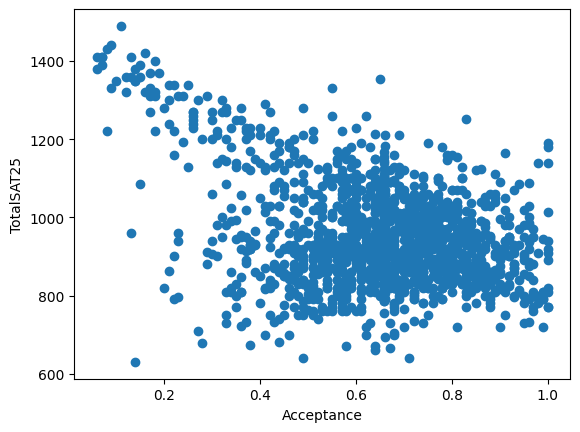

In [89]:
# Visualize data
plt.scatter(df['Acceptance'], df['TotalSAT25'])
plt.xlabel('Acceptance')
plt.ylabel('TotalSAT25');

In [90]:
df_kmeans = df[['TotalSAT25', 'Acceptance']]

In [91]:
scaled_df = scaler.fit_transform(df_kmeans)

In [92]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

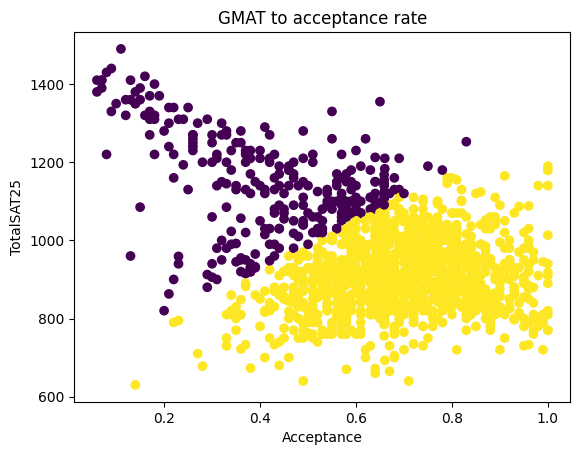

In [93]:
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['Acceptance'], df['TotalSAT25'], c = df['cluster'])
plt.xlabel('Acceptance')
plt.ylabel('TotalSAT25')
plt.title('GMAT to acceptance rate');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

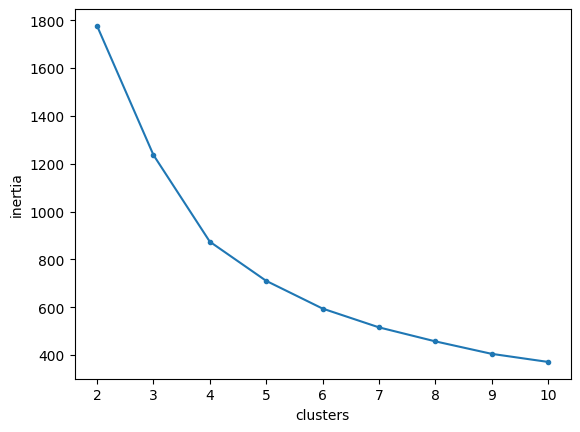

In [94]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

In [95]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

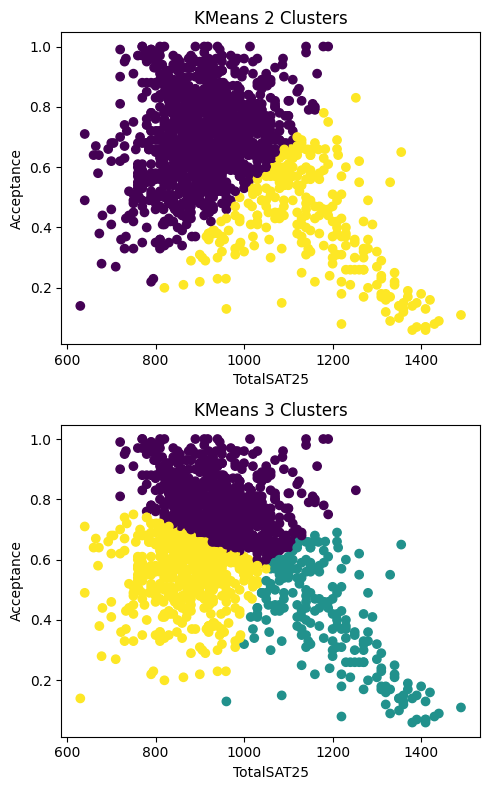

In [96]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['TotalSAT25'], df['Acceptance'], c = df['cluster2'])
axes[0].set_xlabel('TotalSAT25')
axes[0].set_ylabel('Acceptance')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['TotalSAT25'], df['Acceptance'], c = df['cluster3'])
axes[1].set_xlabel('TotalSAT25')
axes[1].set_ylabel('Acceptance')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

In [97]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-97-5544f21ea784>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df.groupby('cluster', as_index=False).mean()


,cluster,"Tuition and fees, 2013-14",TotalSAT25,Acceptance,Yield Rate,cluster2,cluster3
0,0,28619.977860,1142.538921,0.419954,0.340416,1.0,1.103321
1,1,18982.902936,909.781973,0.696886,0.329711,0.0,0.807504


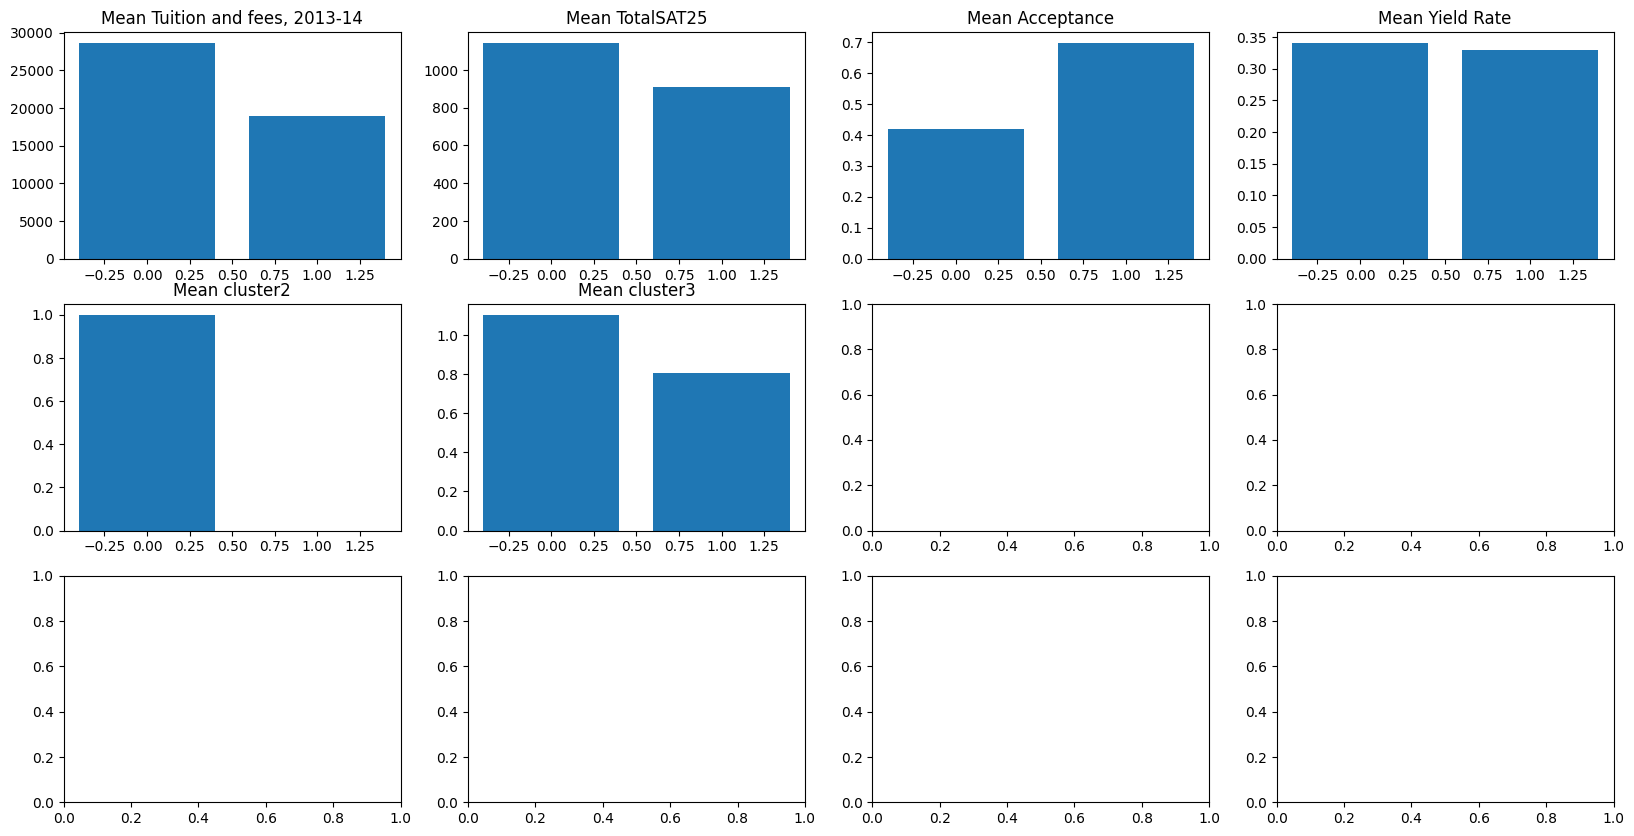

In [98]:
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#One Hot Encoding

In [99]:
# New Imports
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [119]:
#Select categorigal columns only for the test and test data
X_train_cat=X_train[cat_cols]
X_test_cat= X_test[cat_cols]

##Ordinal OHE

In [ ]:
ordinal_cols = ['% of Hispanic/Latino','% of Women','Acceptance Rate by Group']

In [124]:
qual_cond_order_hispanic= ['VERY Low (0%-5%)', 'LOW 5%-10%', 'MEDIUM 10%-15%','HIGH 15%-20%','OVER 20%']
qual_cond_order_women= ['VERY Low (0%-20%)','LOW 20%-40%','NORMAL 45%-55%','HIGH 55%-80%','OVER 80%']
qual_cond_order_acceptance= ['LEAST Competitive 80%+','Not as Competitive 60%-80%','Competitive 40%-60%','Very Competitive 20%-40%','MOST Competitive 0%-20%']

In [125]:
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order_hispanic, qual_cond_order_women, qual_cond_order_acceptance]

In [126]:
# Instantiate the encoder and include the list of ordered values as an argument
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
ord_encoder

OrdinalEncoder(categories=[['VERY Low (0%-5%)', 'LOW 5%-10%', 'MEDIUM 10%-15%',
                            'HIGH 15%-20%', 'OVER 20%'],
                           ['VERY Low (0%-20%)', 'LOW 20%-40%',
                            'NORMAL 45%-55%', 'HIGH 55%-80%', 'OVER 80%'],
                           ['LEAST Competitive 80%+',
                            'Not as Competitive 60%-80%', 'Competitive 40%-60%',
                            'Very Competitive 20%-40%',
                            'MOST Competitive 0%-20%']])

In [128]:
# Fit the encoder on the training data
ord_encoder.fit(X_train_cat[ordinal_cols])

OrdinalEncoder(categories=[['VERY Low (0%-5%)', 'LOW 5%-10%', 'MEDIUM 10%-15%',
                            'HIGH 15%-20%', 'OVER 20%'],
                           ['VERY Low (0%-20%)', 'LOW 20%-40%',
                            'NORMAL 45%-55%', 'HIGH 55%-80%', 'OVER 80%'],
                           ['LEAST Competitive 80%+',
                            'Not as Competitive 60%-80%', 'Competitive 40%-60%',
                            'Very Competitive 20%-40%',
                            'MOST Competitive 0%-20%']])

In [129]:
# Transform the training data
X_train_ordinal_enc = ord_encoder.transform(X_train_cat[ordinal_cols])

In [130]:
# View results
X_train_ordinal_enc

,% of Hispanic/Latino,% of Women,Acceptance Rate by Group
1506,1.0,3.0,0.0
627,0.0,3.0,2.0
188,1.0,3.0,3.0
436,0.0,2.0,1.0
1263,4.0,3.0,0.0
...,...,...,...
1150,0.0,3.0,1.0
1316,2.0,1.0,0.0
876,0.0,3.0,2.0
1487,1.0,3.0,0.0


In [136]:
# Transform the test data
X_test_ordinal_enc = ord_encoder.transform(X_test_cat[ordinal_cols])


In [137]:
# View the results
X_test_ordinal_enc

,% of Hispanic/Latino,% of Women,Acceptance Rate by Group
1051,1.0,3.0,0.0
1326,4.0,3.0,1.0
1412,1.0,2.0,2.0
1521,0.0,3.0,0.0
803,4.0,3.0,3.0
...,...,...,...
1420,0.0,3.0,2.0
406,0.0,3.0,0.0
1241,0.0,3.0,1.0
821,0.0,3.0,0.0


##Nominal OHE

In [138]:
# saving list of categorical features to one-hot-encode
ohe_cols = X_train_cat.drop(columns=ordinal_cols).columns
ohe_cols

Index(['Region', 'Urbanization', 'Degree', 'Top School'], dtype='object')

In [139]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [140]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(X_train_cat[ohe_cols])



OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [141]:
# Transform the training data
X_train_cat_ohe = ohe_encoder.transform(X_train_cat[ohe_cols])
X_train_cat_ohe

,Region_Midwest,Region_Northeast,Region_South,Region_West,Urbanization_City,Urbanization_Rural,Urbanization_Suburb,Urbanization_Town,Urbanization_nan,Degree_Baccalaureate & Associate's Colleges,Degree_Baccalaureate Colleges,Degree_Doctoral & Research Universities,Degree_Master's Colleges and Universities,Degree_Research Universities,Top School_0,Top School_1
1506,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
627,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1316,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1487,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [142]:
# Transform the testing data
X_test_cat_ohe = ohe_encoder.transform(X_test_cat[ohe_cols])
X_test_cat_ohe

,Region_Midwest,Region_Northeast,Region_South,Region_West,Urbanization_City,Urbanization_Rural,Urbanization_Suburb,Urbanization_Town,Urbanization_nan,Degree_Baccalaureate & Associate's Colleges,Degree_Baccalaureate Colleges,Degree_Doctoral & Research Universities,Degree_Master's Colleges and Universities,Degree_Research Universities,Top School_0,Top School_1
1051,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1521,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
803,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
821,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#MODEL SELECTION

- Best model to select is the linear regression as it has the highest R2 of 0.9996 and really low MAE, MSE and RMSE.

##Principal Component Analysis (PCA) for Visualization: TO DISCUSS! PENDING; GETTING AN ERROR

In [157]:
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


In [169]:
# Save X data
X = df.drop(columns = 'Acceptance')
# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['Acceptance'])

In [166]:
# Create a column transformer for preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(), X.select_dtypes(include=['int', 'float']).columns),
    (OneHotEncoder(), X.select_dtypes(include='object').columns),
    sparse_threshold=0
)

In [172]:
scaled_df = preprocessor.fit_transform(X)

ValueError: ignored

In [173]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)

In [174]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

InvalidIndexError: ignored

<Figure size 800x400 with 0 Axes>